In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import data and drop NAs,
calculate metascore/10 and rating*10

In [2]:
imdb = pd.read_csv("C:\\Users\\Adam\\Google Drive\\School\\ComputerScience\\intro to data science\\rotten_needles\\data\\datasets\\movies_dataset.csv")
#imdb = imdb.dropna()
imdb = imdb.assign(rating10=(imdb['rating']*10))
imdb = imdb.assign(metascore10=(imdb['metascore']/10))

create movie profit score column

In [3]:
imdb = imdb.assign(score1=100*(imdb.gross_income-imdb.budget)/imdb.budget)
imdb = imdb.assign(score2=(imdb['gross_income']-imdb['budget']))  # best score measure
imdb = imdb.assign(score3=np.log(imdb['gross_income'])/np.log(imdb['budget']))

In [4]:
# imdb[['score2', 'name','rating','metascore']].sort_values('score2',ascending=0)

# Figure shows scatter of gross income against meta score and imdb rating

<IPython.core.display.Javascript object>


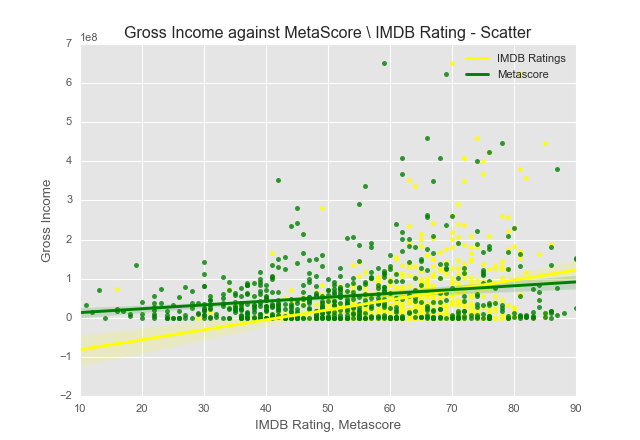

In [5]:
plt.figure()
sns.regplot(x = imdb['rating']*10, y = 'gross_income', data = imdb, color = 'yellow')
sns.regplot(x = imdb['metascore'], y = 'gross_income', data = imdb, color = 'Green')
sns.plt.title("Gross Income against MetaScore \ IMDB Rating - Scatter")
sns.plt.xlabel("IMDB Rating, Metascore")
sns.plt.ylabel("Gross Income")
# legend_patches = matplotlib.patches.Patch(color='green', label='label')

# Plot the legend
sns.plt.legend(['IMDB Ratings', 'Metascore'])

# Figure shows distributions of movie Raters

<IPython.core.display.Javascript object>


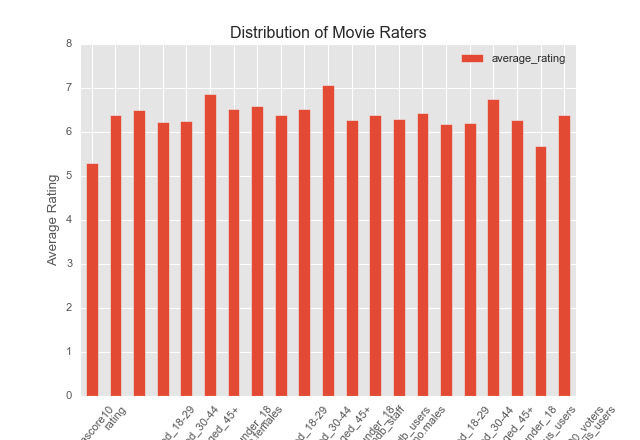

In [6]:
temp = pd.DataFrame(imdb[['metascore10','rating'] + [avg for avg in imdb.columns if 'avg_rating' in avg]].mean())
temp.columns = ['average_rating']
temp.plot(kind='bar')
plt.xticks(rotation=50)
sns.plt.title("Distribution of Movie Raters")
sns.plt.xlabel("Movie Rater")
sns.plt.ylabel("Average Rating")

# Figure shows distribution of Movie Ratings

<IPython.core.display.Javascript object>


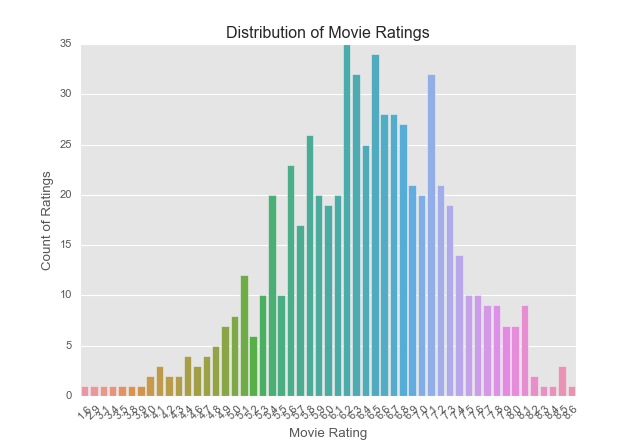

In [7]:
plt.figure()
sns.countplot(x = 'rating', data = imdb)
plt.xticks(rotation=45)
sns.plt.title("Distribution of Movie Ratings")
sns.plt.xlabel("Movie Rating")
sns.plt.ylabel("Count of Ratings")

# Distribution of ratings by Genres

In [8]:
temp = pd.DataFrame(
    data = {
            'type':
                [i for i in range(1,11) for genre in imdb.columns  if 'genre' in genre],
            'votes':
                [imdb[imdb[genre] == 1]['rating_freq.1'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.2'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.3'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.4'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.5'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.6'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.7'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.8'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.9'].mean() for genre in imdb.columns if 'genre' in genre] +
                [imdb[imdb[genre] == 1]['rating_freq.10'].mean() for genre in imdb.columns if 'genre' in genre]
        },
    index= 
         [genre for genre in imdb.columns if 'genre' in genre]*10
    
)

<IPython.core.display.Javascript object>


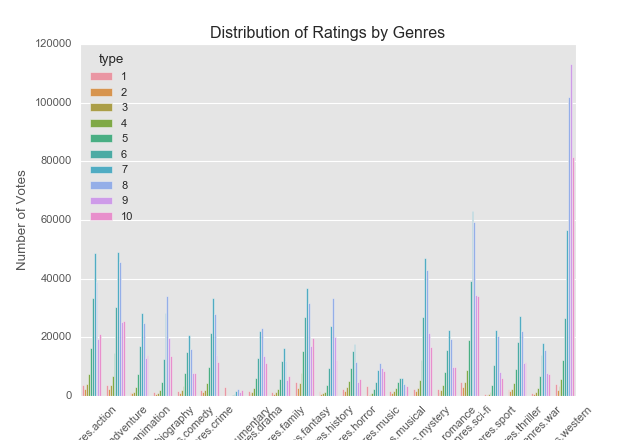

In [9]:
plt.figure()
sns.barplot(x = temp.index , y = 'votes',hue = 'type', data = temp)
plt.xticks(rotation=45)
sns.plt.title("Distribution of Ratings by Genres")
sns.plt.xlabel("Genres")
sns.plt.ylabel("Number of Votes")

scattering stuff

In [10]:
# plt.figure()
# plt.ylim([0,10])
# plt.xlim([0,10])
# sns.regplot(x ='avg_rating_per_demo.aged_under_18', y = 'avg_rating_per_demo.aged_45+', data = imdb, color = 'red')

In [11]:
# plt.figure()
# plt.ylim([0,10])
# plt.xlim([0,10])
# sns.regplot(x ='avg_rating_per_demo.aged_18-29', y = 'avg_rating_per_demo.aged_45+', data = imdb, color = 'green')

In [12]:
# imdb.plot(kind='scatter', x='rating', y='avg_rating_per_demo.us_users');

# Figure shows high correlation between opening weekend incomes and Total weekend

<IPython.core.display.Javascript object>


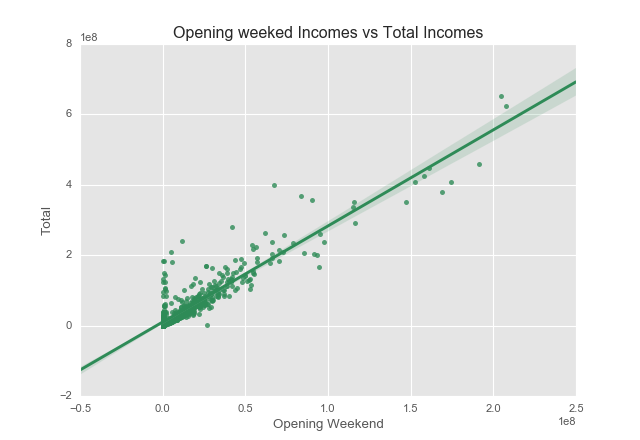

In [13]:
plt.figure()
sns.regplot(x = 'opening_weekend_income', y = 'gross_income', data=imdb, color='seagreen')
sns.plt.title("Opening weeked Incomes vs Total Incomes")
sns.plt.xlabel("Opening Weekend")
sns.plt.ylabel("Total")

correlations

In [14]:
# imdb[['metascore','critic_review_count','rating','rating_count','gross_income','rating_freq.3','rating_freq.4','rating_freq.5','rating_freq.6',
#       'rating_freq.7','rating_freq.8','rating_freq.9','score2']].corr()
# imdb[['avg_rating_per_demo.males','avg_rating_per_demo.females']].corr()

# figure shows how different age groups tend to vote the same, the diagonal shows the rating distribution of each age group

<IPython.core.display.Javascript object>


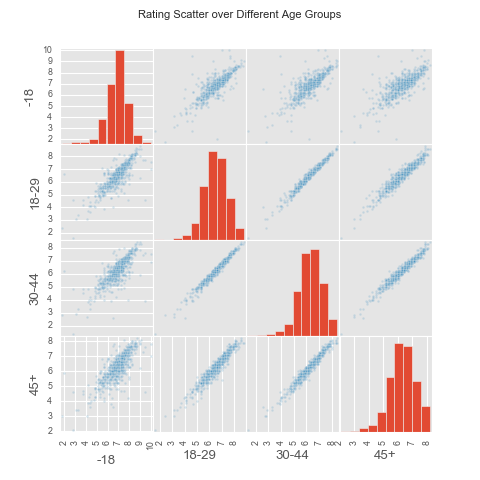

In [15]:
from pandas.tools.plotting import scatter_matrix
temp = imdb[['avg_rating_per_demo.aged_under_18','avg_rating_per_demo.aged_18-29',
                     'avg_rating_per_demo.aged_30-44','avg_rating_per_demo.aged_45+']]
temp.columns = ['-18','18-29','30-44','45+']
scatter_matrix(temp, alpha=0.2,figsize=(6,6))

plt.suptitle('Rating Scatter over Different Age Groups')

# figure shows that above 400K voters, the average rating is allways greater than 7 - people tend to rate when they like a movie

<IPython.core.display.Javascript object>


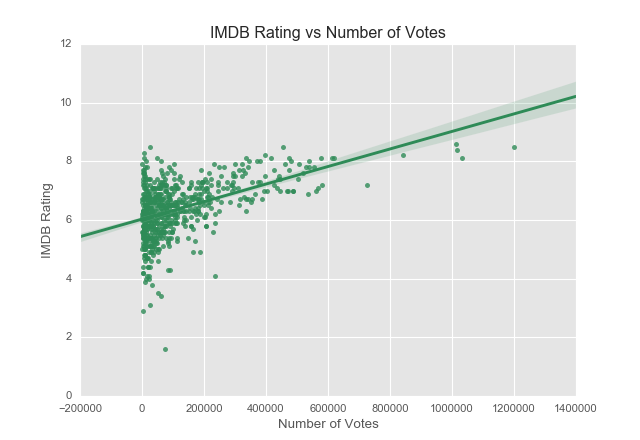

In [16]:
plt.figure()
sns.regplot(x = 'rating_count', y = 'rating', data=imdb, color='seagreen')
sns.plt.title("IMDB Rating vs Number of Votes")
sns.plt.xlabel("Number of Votes")
sns.plt.ylabel("IMDB Rating")

# figure shows the difference of males and females number  of votes over different genres

In [17]:
temp = pd.DataFrame(
    data={
        'sex':
        ['Male' for genre in imdb.columns if 'genre' in genre]
        +
        ['Female' for genre in imdb.columns if 'genre' in genre],
     
        'score':
        [
            imdb[imdb[genre] == 1]['votes_per_demo.males'].mean() 
            for genre in imdb.columns if 'genre' in genre
        ] 
        +
        [
            imdb[imdb[genre] == 1]['votes_per_demo.females'].mean() 
            for genre in imdb.columns if 'genre' in genre
        ]
    },
    index=
    [genre[genre.rfind('.')+1:] for genre in imdb.columns if 'genre' in genre] 
    +
    [genre[genre.rfind('.')+1:] for genre in imdb.columns if 'genre' in genre] 
)    

<IPython.core.display.Javascript object>


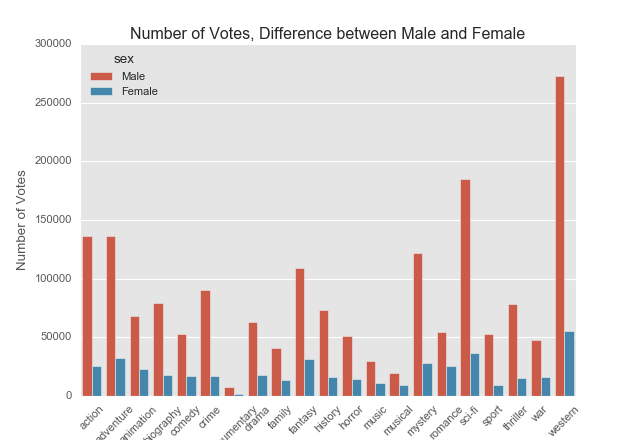

In [18]:
plt.figure()
sns.barplot(x = temp.index , y = 'score',hue = 'sex', data = temp)
plt.xticks(rotation=45)
sns.plt.title("Number of Votes, Difference between Male and Female")
sns.plt.xlabel("Genres")
sns.plt.ylabel("Number of Votes")

# figure shows the similarity of males and females average scores over different genres - women are more mefargenot!

In [19]:
temp1 = pd.DataFrame(
    data={
        'sex':
        ['Male' for genre in imdb.columns if 'genre' in genre]
        +
        ['Female' for genre in imdb.columns if 'genre' in genre],
     
        'score':
        [
            imdb[imdb[genre] == 1]['avg_rating_per_demo.males'].mean() 
            for genre in imdb.columns if 'genre' in genre
        ] 
        +
        [
            imdb[imdb[genre] == 1]['avg_rating_per_demo.females'].mean() 
            for genre in imdb.columns if 'genre' in genre
        ]
    },
    index=
    [genre[genre.rfind('.')+1:] for genre in imdb.columns if 'genre' in genre] 
    +
    [genre[genre.rfind('.')+1:] for genre in imdb.columns if 'genre' in genre] 
)    

<IPython.core.display.Javascript object>


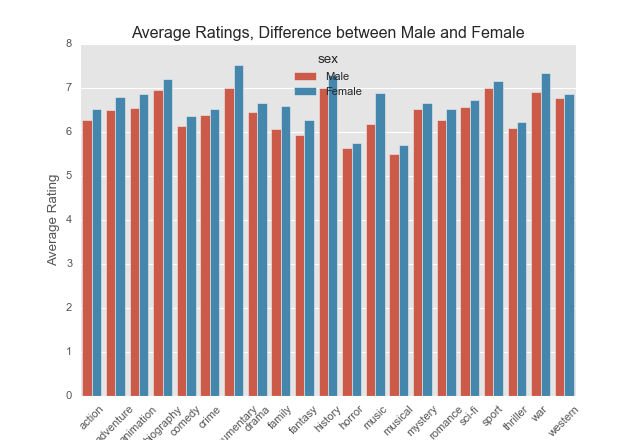

In [20]:
plt.figure()
sns.barplot(x = temp1.index , y = 'score',hue = 'sex', data = temp1)
plt.xticks(rotation=45)
sns.plt.title("Average Ratings, Difference between Male and Female")
sns.plt.xlabel("Genres")
sns.plt.ylabel("Average Rating")

In [21]:
# plt.figure()
# plt.ylim([0,10])
# plt.xlim([0,10])
# sns.regplot(x ='avg_rating_per_demo.males', y = 'avg_rating_per_demo.females', data = imdb, color = 'red')

# figure shows retrun on investment (gross income divided by budget)

In [22]:
temp2 = pd.DataFrame(
    data={
        'score':
        [
            imdb[imdb[genre] == 1]['score1'].mean() 
            for genre in imdb.columns if 'genre' in genre
        ] 
    },
    index=
    [genre[genre.rfind('.')+1:] for genre in imdb.columns if 'genre' in genre] 
)    

<IPython.core.display.Javascript object>


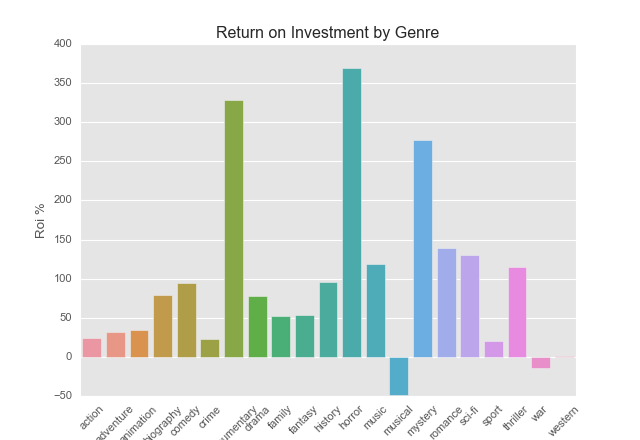

In [23]:
plt.figure()
sns.barplot(x = temp2.index , y = 'score', data = temp2)
plt.xticks(rotation=45)
sns.plt.title("Return on Investment by Genre")
sns.plt.xlabel("Genres")
sns.plt.ylabel("Roi %")